In [1]:
 #Commençons par charger les bibliothèque neccessaire
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importation du Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importation train_test_split function
from sklearn import metrics #Importation de  scikit-learn metrics module pour le calcul de la précion (accuracy)

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#Le dataset qu'on veut utiliser retrace certaines les données médicales de femmes indiennes
#issue de Pima pour deterner si oui ou non elle ont le diabetes
#Concernant l'attribut label
# 0 : l'individu n'a pas le diabete
# 1 : l'individu n'a pas le diabete
# chargement du dataset
pima = pd.read_csv("../diabetespr.csv", header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
#Division des columns en deux types de variable
#variable cible ou dépendante (target)
#variables de caractéristiques ou indépendante(feature)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [31]:
#Division l'ensemble de données en ensemble d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [39]:
# Création de l'objet  Decision Tree classifer 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Entainement du  Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [40]:
#Prédiction de response pour les données de  test 
y_pred = clf.predict(X_test)

In [41]:
# Précision du modèle , à quelle fréquence le classificateur est-il correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [42]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[124  22]
 [ 31  54]]


In [43]:
#Précision
from sklearn.metrics import precision_score

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision = " , precision)

Precision =  0.7105263157894737


In [44]:
#Rappel
from sklearn.metrics import recall_score

rappel = recall_score(y_true=y_test, y_pred=y_pred)
print("Rappel = " , rappel)

Rappel =  0.6352941176470588


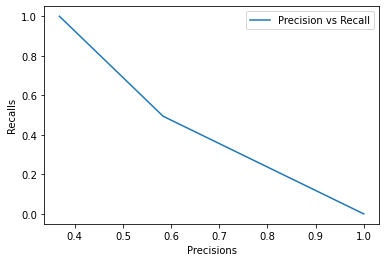

In [15]:
#Compromis précision-rappel
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precisions,recalls,probas = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.plot(precisions,recalls, label = 'Precision vs Recall')
plt.xlabel('Precisions')
plt.ylabel('Recalls')
plt.legend(loc = 'best')
plt.show()

In [37]:
#Score f1
from sklearn.metrics import f1_score

f1Score=f1_score(y_true=y_test, y_pred=y_pred)
print("F1_score = " , f1Score)

F1_score =  0.5365853658536586


In [25]:
# #Récapitulatif
# from sklearn.metrics import classification_report

# print(classification_report(y_true=y_test, y_pred=y_pred))

In [26]:
# #Coube roc
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label = 'Roc Curve')
# plt.xlabel('False positives')
# plt.ylabel('True Positives or Recalls')
# plt.legend(loc = 'best')
# plt.show()


In [26]:
# #cacul de l'AUC
# from sklearn.metrics import roc_auc_score

# roc_auc_score(y_true=y_test, y_score=y_pred)

In [47]:
# #Pour un rendu graphic de l'arbre de décision
# from sklearn.tree import export_graphviz
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus
# import graphviz
# import os
# # os.environ\["PATH"\] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'
# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"C:\Program Files (x86)\Graphviz\bin"



# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

In [ ]:
# clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)